In [1]:
# Importing required packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Importing Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

In [2]:
# Reading the required dataset
"""
Dataset used in here from sklearn is from UCI Optical Recognition of Handwritten Digits Data Set.

Each datapoint is a 8x8 image of a digit.

This is a copy of the test set of the UCI ML hand-written digits datasets https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits
"""
digits = datasets.load_digits()

# Create feature and target arrays
"""
Splitting dataset into features and target arrays.
"""
X = digits.data
y = digits.target

# Split dataset into train and test
"""
In order to train a model, we need to split the features and targets into batches for training and testing.

According to question, the train test split happens with 50% split size. And the split is random with each iteration.
"""
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.5, random_state=42, stratify=y, shuffle=True)

In [3]:
# Initiate Naive Bayes model
nb = MultinomialNB()

# Train the model in training data
nb.fit(x_train, y_train)

# Predict on test data
y_pred = nb.predict(x_test)

In [4]:
# Print the Naive Bayes score of the model
print("Naive Bayes score: ",nb.score(x_test, y_test))

Naive Bayes score:  0.8921023359288098


In [5]:
# Shows counts of each number in random half
print("Counts of each number in random split.")
unique, count = np.unique(y_test, return_counts=True)
for id in range(0,len(unique)):
  print(f"{unique[id]} : {count[id]}")

Counts of each number in random split.
0 : 89
1 : 91
2 : 88
3 : 92
4 : 91
5 : 91
6 : 91
7 : 89
8 : 87
9 : 90


Prediction on 20 random images.


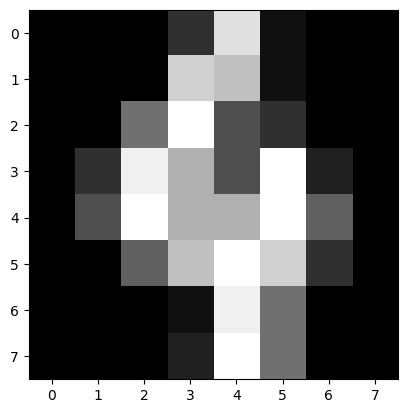

Predicted: 4 | Actual: 4


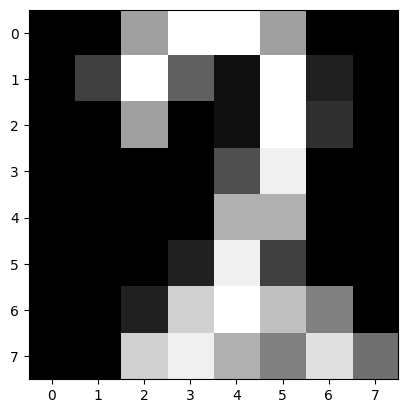

Predicted: 2 | Actual: 2


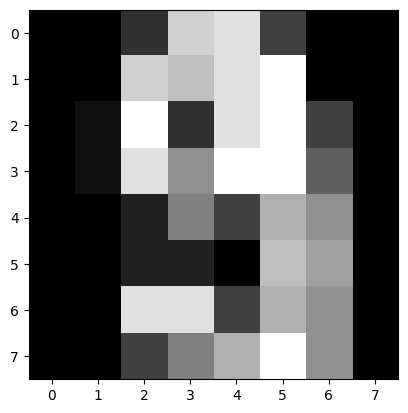

Predicted: 9 | Actual: 9


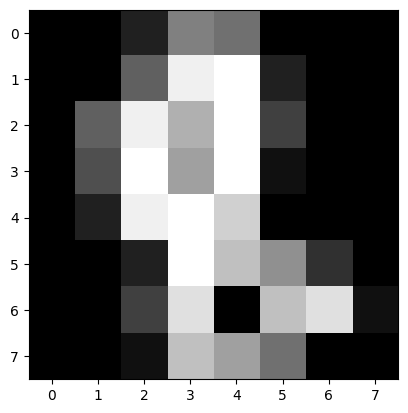

Predicted: 1 | Actual: 8


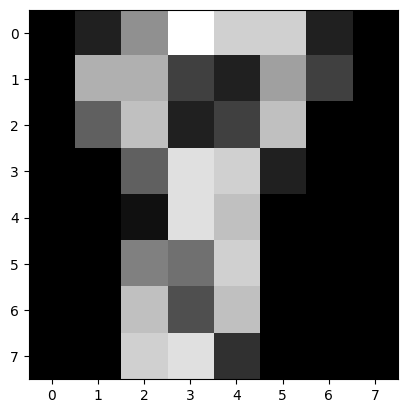

Predicted: 8 | Actual: 8


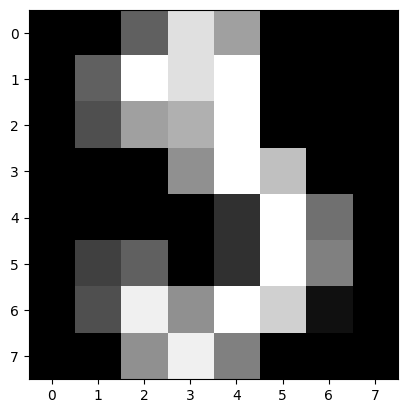

Predicted: 3 | Actual: 3


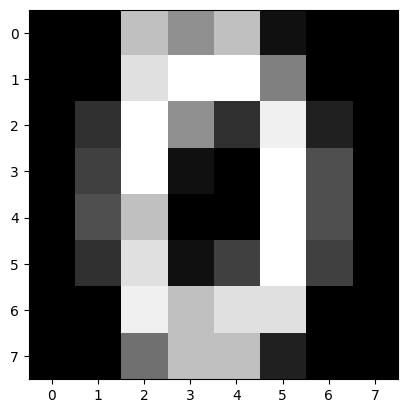

Predicted: 0 | Actual: 0


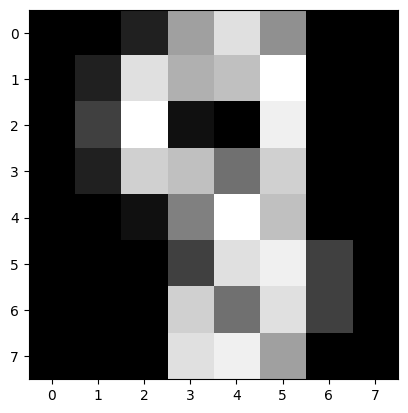

Predicted: 8 | Actual: 8


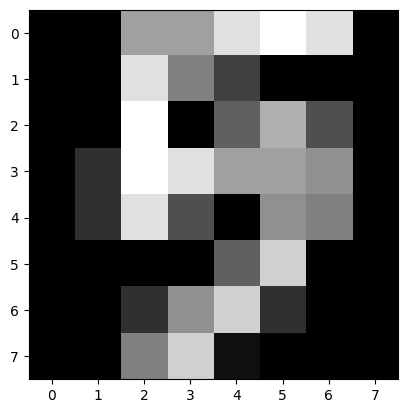

Predicted: 7 | Actual: 5


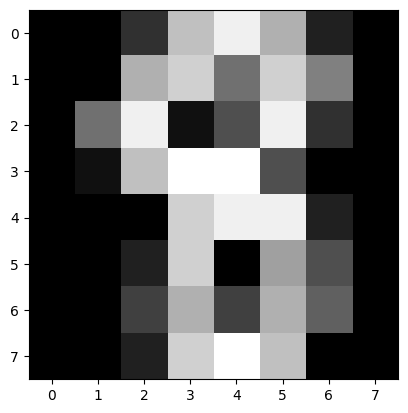

Predicted: 8 | Actual: 8


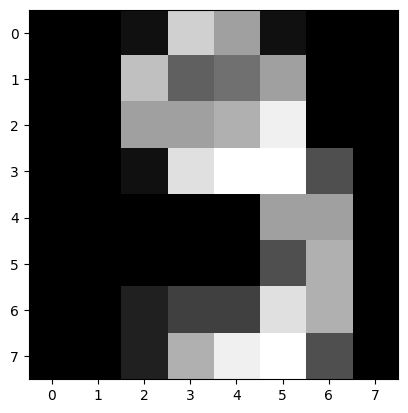

Predicted: 9 | Actual: 9


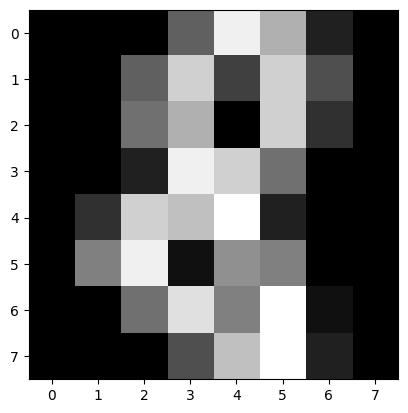

Predicted: 8 | Actual: 8


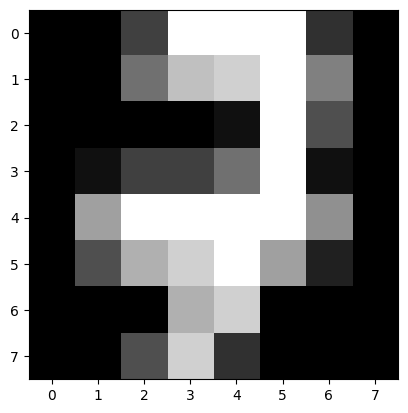

Predicted: 7 | Actual: 7


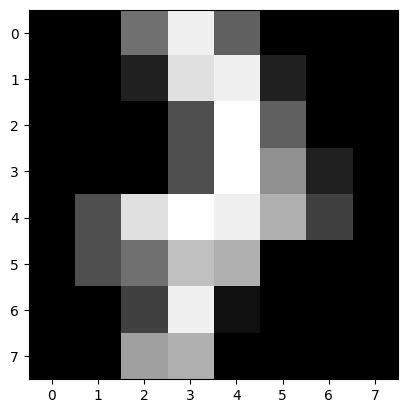

Predicted: 7 | Actual: 7


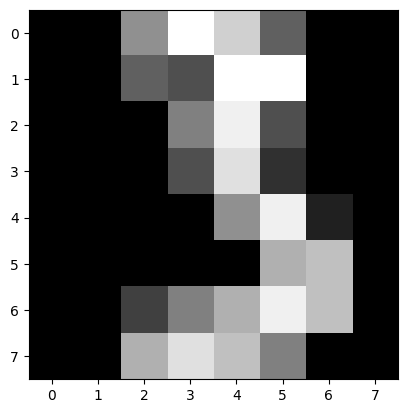

Predicted: 3 | Actual: 3


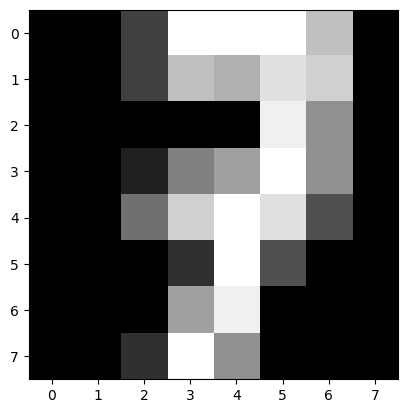

Predicted: 7 | Actual: 7


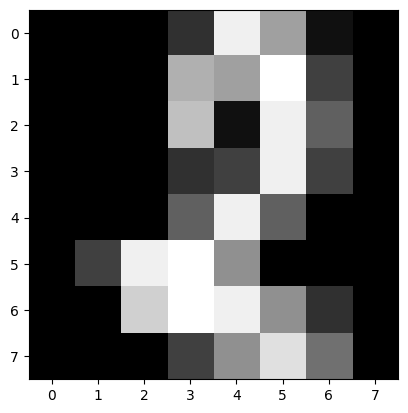

Predicted: 1 | Actual: 2


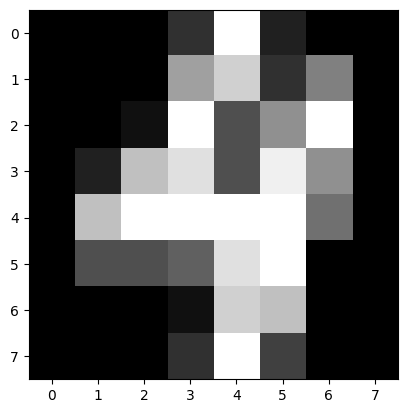

Predicted: 4 | Actual: 4


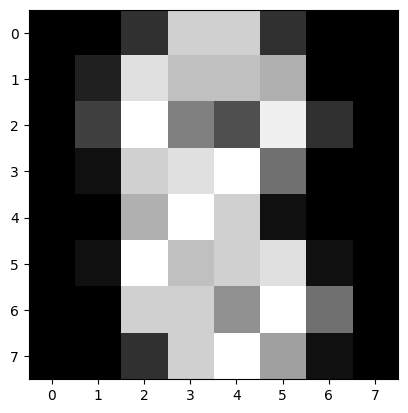

Predicted: 8 | Actual: 8


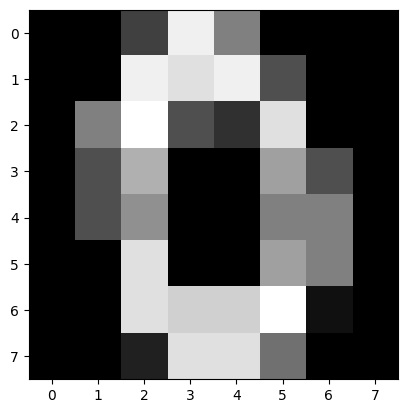

Predicted: 0 | Actual: 0


In [6]:
# Predicts on random 20 images
y_20_pred = nb.predict(x_test[:20])
print("Prediction on 20 random images.")
for id in range(0, 20):
  plt.imshow(x_test[id].reshape(8,-1), cmap=plt.get_cmap('gray'))
  plt.show()
  print(f"Predicted: {y_20_pred[id]} | Actual: {y_test[id]}")


In [7]:
# Build probability table for all single digit numbers.
unique, counts = np.unique(y_test, return_counts=True)
accuracy = accuracy_score(y_test,y_pred)
conf_mat = confusion_matrix(y_test,y_pred)
true_pred = conf_mat.diagonal()

print("Digit  Probability")
for id in range(0, len(true_pred)):
  print(f"{unique[id]}  :   {true_pred[id]/counts[id]}")

Digit  Probability
0  :   0.9775280898876404
1  :   0.7582417582417582
2  :   0.875
3  :   0.8913043478260869
4  :   0.945054945054945
5  :   0.8571428571428571
6  :   0.978021978021978
7  :   1.0
8  :   0.8505747126436781
9  :   0.7888888888888889
